In [1]:
import pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

Load dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
                parse_dates=['Month'], index_col='Month')

exploring data

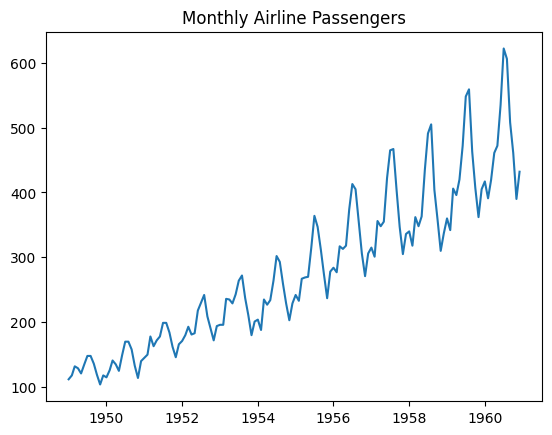

ADF Statistic: 0.8154 p-value: 0.9919


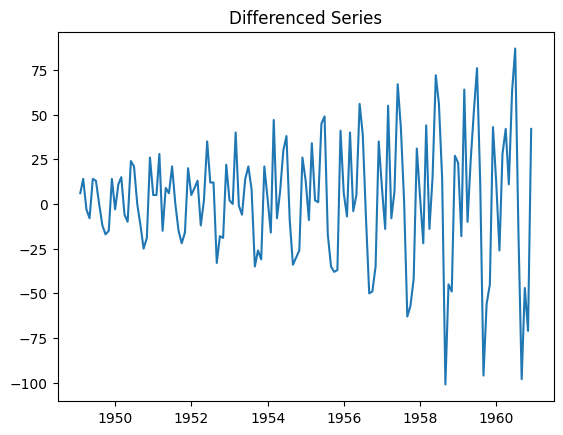

In [3]:
plt.plot(df); plt.title("Monthly Airline Passengers"); plt.show()
adf = adfuller(df['Passengers'])
print("ADF Statistic:", round(adf[0],4), "p-value:", round(adf[1],4))
df_diff = df.diff().dropna()
plt.plot(df_diff); plt.title("Differenced Series"); plt.show()

Building model

c:\Users\Murali krishna M\Desktop\New folder\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Murali krishna M\Desktop\New folder\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Murali krishna M\Desktop\New folder\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


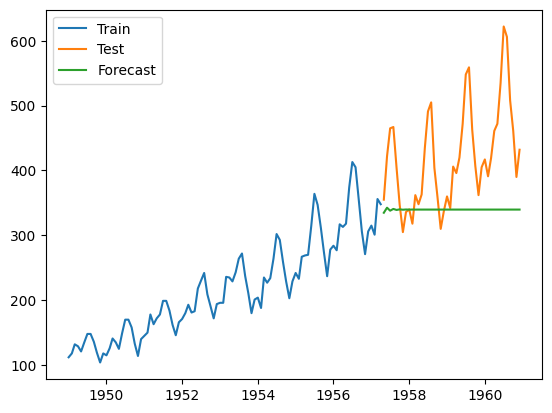

In [4]:
train, test = df[:100], df[100:]
model = ARIMA(train, order=(1,1,1)).fit()
pred = model.forecast(len(test))
plt.plot(train, label='Train'); plt.plot(test, label='Test'); plt.plot(pred, label='Forecast'); plt.legend(); plt.show()

error metric

In [5]:
mse = mean_squared_error(test, pred)
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mse)
print("MSE :", round(mse, 2))
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))

MSE : 12460.36
MAE : 85.63
RMSE: 111.63
